In [1]:
# Classification Random Forest
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
data = pd.read_csv('data/Social_Network_Ads.csv')

In [4]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.shape

(400, 5)

In [6]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, 4].values

In [8]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
# Fitting classifier to the Training set
# Create your classifier here
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, 
                                    criterion='entropy',#"gini"
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.,
                                    max_features="auto",#'sqrt','log2',None
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=1,
                                    random_state=0,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None)

model_rf.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=1,
                       random_state=0)

In [11]:
# Predicting the Test set results
y_pred = model_rf.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_f = confusion_matrix(y_test, y_pred)
cm_f

array([[63,  5],
       [ 4, 28]], dtype=int64)

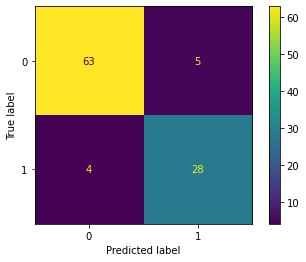

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm_f).plot()